In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from scipy import stats
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [2]:
payments = pd.read_excel("hubspot-crm-exports-all-payments-export-2021-06-02 (For Students).xlsx",
                      encoding = "ISO-8859-1")
# contacts = pd.read_excel('hubspot-crm-exports-all-contacts-2021-06-03 (For Students).xlsx')
# calls = pd.read_excel('hubspot-crm-exports-recorded-calls-2021-06-02 (For Students).xlsx')

In [3]:
payments_trimmed = pd.read_excel('payments_trimmed.xlsx',sheet_name='Sheet1',encoding = "ISO-8859-1")
testing = pd.read_excel('payments_trimmed.xlsx',sheet_name='Sheet2',encoding = "ISO-8859-1")

In [4]:
payments.head()

,Deal ID,Order value (DEPRICATED),Closed Won Reason,Mode,Annual contract value,State of Residence,Last Modified Date,Processing mode,Recurring revenue Product Code,Pipeline,...,Recurring revenue inactive date,Strategy Session Outcome,Forecast category,Recurring revenue amount,Amount in company currency,Billing Contact,Associated Company ID,Associated Company,Associated Contact IDs,Associated Contacts
0,5283964720,NaN,NaN,NaN,NaN,NaN,2021-06-02 08:00:00,DepositFix,NaN,Sales Pipeline,...,NaT,NaN,Closed won,NaN,NaN,NaN,NaN,NaN,8346001,Huan Nguyen
1,5175067987,NaN,NaN,NaN,NaN,NaN,2021-05-09 07:37:00,DepositFix,NaN,Sales Pipeline,...,NaT,NaN,Not forecasted,NaN,NaN,NaN,NaN,NaN,8911451,Barb Test12
2,4480656385,NaN,NaN,NaN,NaN,NaN,2021-04-02 15:52:00,DepositFix,NaN,Sales Pipeline,...,NaT,NaN,Not forecasted,NaN,NaN,NaN,NaN,NaN,2640001,yasser Malik
3,4082949600,NaN,NaN,NaN,NaN,CA,2021-06-02 12:58:00,NaN,NaN,Sales Pipeline,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368318,Tiffanie Le
4,4035596209,NaN,NaN,NaN,NaN,NaN,2021-03-22 22:12:00,NaN,NaN,Sales Pipeline,...,NaT,NaN,Not forecasted,NaN,NaN,NaN,NaN,NaN,3691101,Zulfie Alikhan


In [5]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Deal ID                                       9858 non-null   int64         
 1   Order value (DEPRICATED)                      32 non-null     float64       
 2   Closed Won Reason                             0 non-null      float64       
 3   Mode                                          1534 non-null   object        
 4   Annual contract value                         4 non-null      float64       
 5   State of Residence                            1212 non-null   object        
 6   Last Modified Date                            9858 non-null   datetime64[ns]
 7   Processing mode                               8988 non-null   object        
 8   Recurring revenue Product Code                3656 non-null   object

In [6]:
checkna = dict(payments.isna().sum().sort_values(ascending = False))
checkna

{'Campaign of last booking in meetings tool': 9858,
 'Next step': 9858,
 'Tax Rate': 9858,
 'Source of last booking in meetings tool': 9858,
 'Discount Code': 9858,
 'Closed Won Reason': 9858,
 'IHQ Contract Errors': 9858,
 'Date of last meeting booked in meetings tool': 9858,
 'Sale Stage': 9858,
 'Medium of last booking in meetings tool': 9858,
 'Priority': 9858,
 'Deal Description': 9858,
 'Associated Company': 9858,
 'Associated Company ID': 9858,
 'Billing Contact': 9858,
 'Create Contract': 9857,
 'Closed Lost Reason': 9857,
 'Contract Id': 9856,
 'Next Activity Date': 9856,
 'Total contract value': 9854,
 'Annual contract value': 9854,
 'Annual recurring revenue': 9854,
 'Monthly recurring revenue': 9854,
 'Strategy Session Outcome': 9845,
 'Order value (DEPRICATED)': 9826,
 'Refund Date': 9342,
 'Deal Type': 9030,
 'Last Contacted': 8916,
 'Number of times contacted': 8904,
 'Number of Sales Activities': 8904,
 'Last Activity Date': 8904,
 'Subscription Sync Issues': 8766,
 'St

In [7]:
newcheckna = {key: value for (key, value) in checkna.items() if value >= 9826 }
list(newcheckna.keys())

['Campaign of last booking in meetings tool',
 'Next step',
 'Tax Rate',
 'Source of last booking in meetings tool',
 'Discount Code',
 'Closed Won Reason',
 'IHQ Contract Errors',
 'Date of last meeting booked in meetings tool',
 'Sale Stage',
 'Medium of last booking in meetings tool',
 'Priority',
 'Deal Description',
 'Associated Company',
 'Associated Company ID',
 'Billing Contact',
 'Create Contract',
 'Closed Lost Reason',
 'Contract Id',
 'Next Activity Date',
 'Total contract value',
 'Annual contract value',
 'Annual recurring revenue',
 'Monthly recurring revenue',
 'Strategy Session Outcome',
 'Order value (DEPRICATED)']

In [8]:
payments = payments.drop(columns = list(newcheckna.keys()))

In [9]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Deal ID                            9858 non-null   int64         
 1   Mode                               1534 non-null   object        
 2   State of Residence                 1212 non-null   object        
 3   Last Modified Date                 9858 non-null   datetime64[ns]
 4   Processing mode                    8988 non-null   object        
 5   Recurring revenue Product Code     3656 non-null   object        
 6   Pipeline                           9858 non-null   object        
 7   Forecast Probability               9857 non-null   float64       
 8   Close Date                         9849 non-null   datetime64[ns]
 9   Deal Type                          828 non-null    object        
 10  Number of times contacted          9

In [10]:
payments['Deal ID'] = payments['Deal ID'].astype('str')

## Data Quality Summary Tables

In [11]:
## create a function to summarize the data quality
def dataquality_numeric(raw):
    print(f'Dataset Shape:{raw.shape}')
    numeric_col = raw.select_dtypes(include=['int64','float64'])   
    summary = pd.DataFrame(numeric_col.dtypes,columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]  
    summary['# of Records'] = numeric_col.count().values
    summary['% populated'] = (((len(raw)-numeric_col.isnull().sum().values)/len(raw))*100).round(2)
    summary['# Zeros'] = numeric_col[numeric_col ==0].count().values
    summary['Uniques'] = numeric_col.nunique().values
    summary['Mean'] = numeric_col.mean().values
    summary['Maximum'] = numeric_col.max().values
    summary['Minimum'] = numeric_col.min().values
    summary['Standard Deviation'] = numeric_col.std().values
      
    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(numeric_col[name].value_counts(normalize = True),base = 2),2)
    return summary

## create a function to summarize the data quality for categorical variables
def dataquality_categorical(raw):
    print(f'Dataset Shape:{raw.shape}')
    categorical_col = raw.select_dtypes(include = ['object','category'])
    #print(categorical_col)
    summary = pd.DataFrame(categorical_col.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['# of Records'] = categorical_col.count().values
    summary['% populated'] = (((len(raw) - categorical_col.isnull().sum().values)/(len(raw)))*100).round(2)
    summary['# NA'] = categorical_col.isnull().sum().values \
    + categorical_col[categorical_col =='-1'].count().values
    summary['# Unique_Values'] = categorical_col.nunique().values
    summary['First_Value'] = categorical_col.loc[0].values
    summary['Second_Value'] = categorical_col.loc[1].values
    summary['Third_Value'] = categorical_col.loc[2].values
    count_value = pd.DataFrame(index = categorical_col.columns,columns = ['count'])
    most_common = pd.DataFrame(index = categorical_col.columns,columns = ['MostCommon'])
    #print(count_value)
    #print(most_common)
    for col in categorical_col.columns:
        count_value.loc[col,'count'] = categorical_col[col].value_counts(normalize = True).values[0]*100
        most_common.loc[col,'MostCommon'] = categorical_col[col].mode().values 
    summary['% Most_Common_Field'] = count_value['count'].values.astype(float).round(2)
    summary['Most_Common_Field'] = most_common['MostCommon'].values

    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
          summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(categorical_col[name].value_counts(normalize = True),base = 2),2)
    return summary
def dataquality_datetime(raw):
    print(f'Dataset Shape:{raw.shape}')
    datetime_col = raw.select_dtypes(include = ["datetime64[ns]"])
    summary = pd.DataFrame(datetime_col.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['# of Records'] = datetime_col.count().values
    summary['% populated'] = (((len(raw) - datetime_col.isnull().sum().values)/(len(raw)))*100).round(2)
    summary['# NA'] = datetime_col.isnull().sum().values
    summary['# Unique_Values'] = datetime_col.nunique().values
    summary['Maximum'] = datetime_col.max().values
    summary['Minimum'] = datetime_col.min().values

    count_value = pd.DataFrame(columns = ['count'])
    most_common = pd.DataFrame(columns = ['Most Common'])
    for col in datetime_col.columns:
        count_value.loc[col,'count'] = datetime_col[col].value_counts(normalize = True).values[0]*100
        most_common.loc[col,'Most Common'] = datetime_col[col].mode().values
    summary['%Most_Common_Field'] = count_value['count'].values.astype(float).round(2)
    summary['Most_Common_Field'] = most_common['Most Common'].values

    #Calculate the entropy of a distribution for given probability values.
    for name in summary['Name'].value_counts().index:
          summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(datetime_col[name].value_counts(normalize = True),base = 2),2)
    return summary

In [12]:
numeric_DQR = dataquality_numeric(payments)
numeric_DQR

Dataset Shape:(9858, 52)


,Name,dtypes,# of Records,% populated,# Zeros,Uniques,Mean,Maximum,Minimum,Standard Deviation,Entropy
0,Forecast Probability,float64,9857,99.99,1943,2,8.028812e-01,1.000000e+00,0.00,3.978430e-01,0.72
1,Number of times contacted,float64,954,9.68,12,21,4.443396e+00,2.200000e+01,0.00,2.995877e+00,3.32
2,Number of Sales Activities,float64,954,9.68,0,22,4.743187e+00,2.800000e+01,1.00,3.342951e+00,3.33
3,Quantity,float64,1534,15.56,0,1,1.000000e+00,1.000000e+00,1.00,0.000000e+00,0.00
4,Forecast Amount,float64,9782,99.23,1882,71,4.691215e+02,6.000000e+03,-6488.83,1.038111e+03,3.08
5,Tax Amount,float64,1534,15.56,1534,1,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.00
6,Order ID.1,float64,6292,63.83,0,3966,8.390412e+07,6.244779e+10,61713825.00,7.863538e+08,11.59
7,Order Value,float64,2569,26.06,0,17,3.796594e+03,6.000000e+03,0.50,2.167011e+03,2.50
8,Number of Contacts,int64,9858,100.00,53,3,9.947251e-01,2.000000e+00,0.00,7.382759e-02,0.05
9,Amount,float64,9782,99.23,11,79,8.887809e+02,4.800000e+04,-6488.83,1.667657e+03,3.11


In [13]:
categorical_DQR = dataquality_categorical(payments)
categorical_DQR

Dataset Shape:(9858, 52)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,First_Value,Second_Value,Third_Value,% Most_Common_Field,Most_Common_Field,Entropy
0,Deal ID,object,9858,100.00,0,9858,5283964720,5175067987,4480656385,0.01,"[1942733293, 2240580919, 2240583116, 224059080...",13.27
1,Mode,object,1534,15.56,8324,1,NaN,NaN,NaN,100.00,[Live],0.00
2,State of Residence,object,1212,12.29,8646,46,NaN,NaN,NaN,28.47,[CA],4.36
3,Processing mode,object,8988,91.17,870,3,DepositFix,DepositFix,DepositFix,69.79,[EasyPay],0.90
4,Recurring revenue Product Code,object,3656,37.09,6202,4,NaN,NaN,NaN,54.90,[wswp],1.05
5,Pipeline,object,9858,100.00,0,1,Sales Pipeline,Sales Pipeline,Sales Pipeline,100.00,[Sales Pipeline],0.00
6,Deal Type,object,828,8.40,9030,2,NaN,NaN,NaN,98.31,[New Student/Customer],0.12
7,Payment Status,object,1457,14.78,8401,2,NaN,NaN,NaN,98.01,[Paid],0.14
8,Recurring revenue deal type,object,3656,37.09,6202,2,NaN,NaN,NaN,54.95,[Renewal],0.99
9,Original Source Type,object,9805,99.46,53,8,Offline Sources,Offline Sources,Offline Sources,74.51,[Offline Sources],1.29


In [14]:
datetime_DQR = dataquality_datetime(payments)
datetime_DQR

Dataset Shape:(9858, 52)


,Name,dtypes,# of Records,% populated,# NA,# Unique_Values,Maximum,Minimum,%Most_Common_Field,Most_Common_Field,Entropy
0,Last Modified Date,datetime64[ns],9858,100.00,0,5622,2021-06-02 20:28:00,2021-03-19 10:23:00,0.28,[2021-05-18T01:44:00.000000000],12.09
1,Close Date,datetime64[ns],9849,99.91,9,3470,2021-08-31 08:44:00,2018-07-08 06:34:00,0.63,[2021-01-29T16:00:00.000000000],10.29
2,Create Date,datetime64[ns],9858,100.00,0,7358,2021-06-02 20:24:00,2020-04-28 11:18:00,0.26,[2020-11-29T05:59:00.000000000],12.41
3,Processed date,datetime64[ns],8898,90.26,960,332,2021-06-02 00:00:00,2020-07-06 00:00:00,0.78,[2021-01-30T00:00:00.000000000],8.17
4,Last Activity Date,datetime64[ns],954,9.68,8904,852,2021-06-02 18:36:00,2020-10-15 07:39:00,0.31,"[2020-12-06T16:17:00.000000000, 2020-12-17T14:...",9.67
5,Owner Assigned Date,datetime64[ns],3534,35.85,6324,2629,2021-06-02 10:44:00,2020-07-14 00:18:00,1.30,[2020-07-14T00:38:00.000000000],11.15
6,Last Contacted,datetime64[ns],942,9.56,8916,847,2021-06-02 18:36:00,2020-10-15 07:39:00,0.32,"[2020-12-06T16:17:00.000000000, 2020-12-17T14:...",9.67
7,Refund Date,datetime64[ns],516,5.23,9342,146,2021-06-02 00:00:00,2020-07-27 00:00:00,2.33,"[2021-05-05T00:00:00.000000000, 2021-06-02T00:...",6.88
8,Recurring revenue inactive date,datetime64[ns],3115,31.60,6743,334,2022-05-23 17:00:00,2019-07-07 17:00:00,1.77,[2021-02-27T16:00:00.000000000],7.93


## Data Cleaning

Data Cleaning tasks:

**Standardize product name**
- All transactions whose deal name or product name has “ET”, “ETE”, or “Expert Trader” will be marked as ET. 

- All transactions whose deal name or product name has “Mish's Ultimate Trading Program” or “Market Gauge” will be marked as ET. 

- All transactions whose deal name or product name has “Premium Trading Room” or “PTR” will be marked as WSWP. 

- All transactions whose deal name or product name has “MZM” or “Money Zone Method” will be marked as MZM. 
--------

**Test transactions**
- All transactions with customer name contains 'test', or Safaa Abdulhadi should be labeled as Test
- All transactions whose deal name or product name has “test” or “integratehq” will be marked as Test. 
- All transactions whose amount is between $7 and $99 will be marked as MZM. 
- All transactions whose amount is smaller than $7 will be marked as Test. 
standardize sales rep names
- Any else will be marked as unknown. 


In [15]:
payments_trimmed = pd.read_excel('payments_trimmed.xlsx',sheet_name='Sheet1',encoding = "ISO-8859-1")
testing = pd.read_excel('payments_trimmed.xlsx',sheet_name='Sheet2',encoding = "ISO-8859-1")

In [16]:
## add the standardized product name
payments['Product'] = payments_trimmed['Product']

In [17]:
## drop the testing trasactions

In [18]:
testing.head()

,Unnamed: 0,TESTING Contacts
0,NaN,Barb Test12
1,NaN,test_3payments@integratehq.com
2,NaN,test_4payments@integratehq.com
3,NaN,Tram Pham
4,NaN,student_renewal_viet_course@integratehq.com


In [19]:
testing_contacts = list(testing['TESTING Contacts'])
payments = payments[~payments['Associated Contacts'].isin(testing_contacts)]

## Univariate Plots

In [20]:

def separate_col(df):
    categorical_cols = df.select_dtypes(include=['object'])
    numeric_cols = df.select_dtypes(include=['float64','int64'])
    datetime_cols = df.select_dtypes(include=['datetime64[ns]'])
    return categorical_cols,numeric_cols,datetime_cols
    
def plotdist(df):
    for col in df.columns:
        n_unique = df[col].nunique()
        plt.figure()
        df[col].value_counts()[:min(n_unique,20)].sort_values(ascending = False).plot(kind='bar')
        plt.title(f'Distribution of {col}',fontsize=18)
        plt.xlabel(col,fontsize=14)
        plt.ylabel('Count',fontsize=14)
        plt.grid()
        plt.show()
        print(col)
    return plt.show()

def plothist(df):
    for col in df.columns:
        plt.figure()
        plt.hist(df[col],bins = 80)
        plt.title(f'Histogram of {col}',fontsize=18)
        plt.xlabel(f'{col}',fontsize=14)
        plt.ylabel('Count',fontsize=14)
        plt.grid()
    return plt.show()   

In [21]:
categorical_cols,numeric_cols,datetime_cols = separate_col(payments)

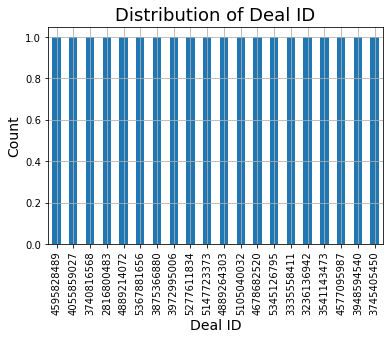

Deal ID


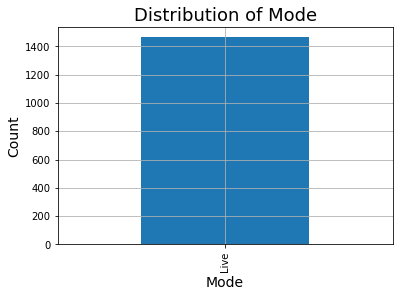

Mode


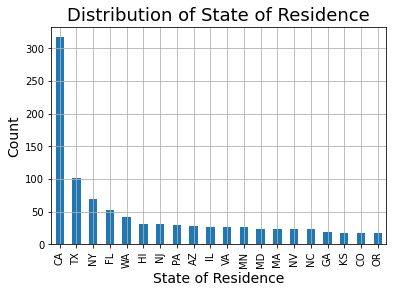

State of Residence


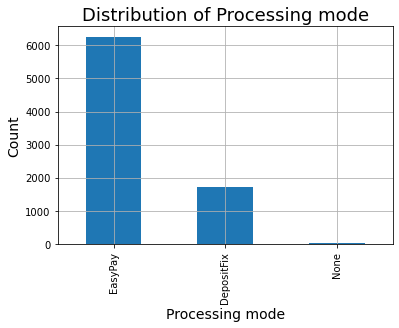

Processing mode


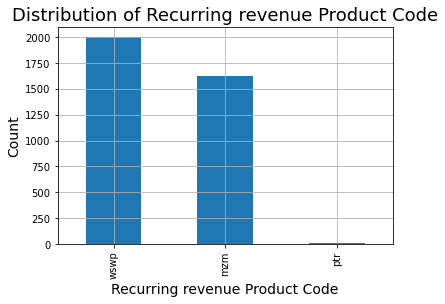

Recurring revenue Product Code


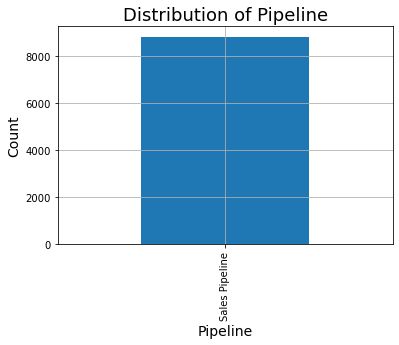

Pipeline


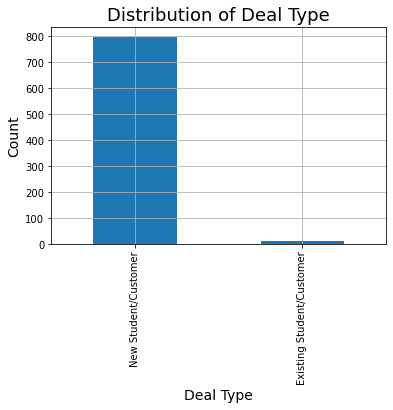

Deal Type


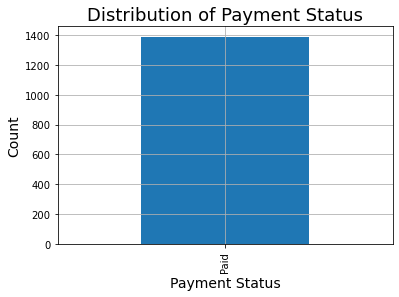

Payment Status


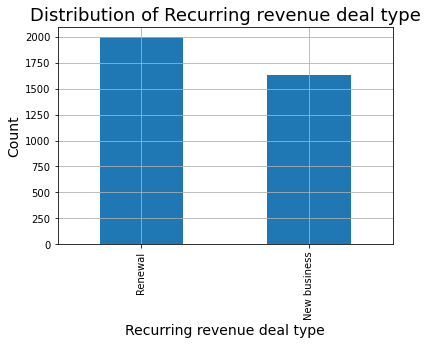

Recurring revenue deal type


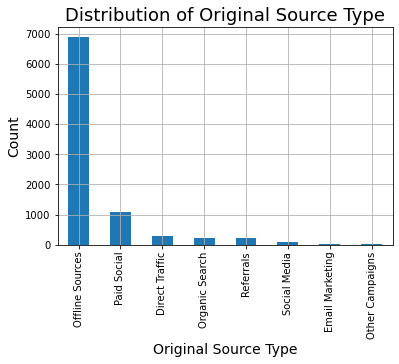

Original Source Type


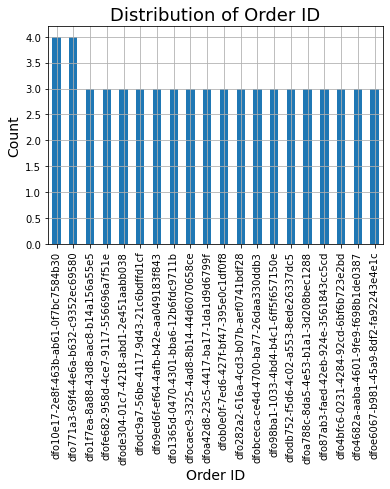

Order ID


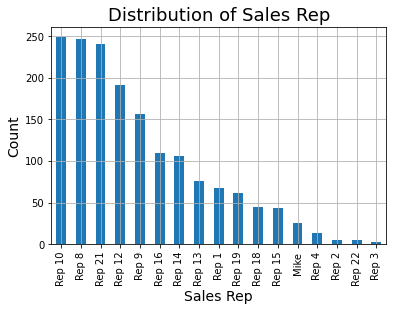

Sales Rep


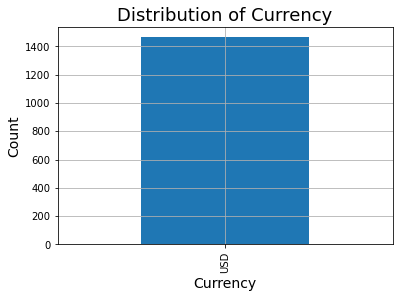

Currency


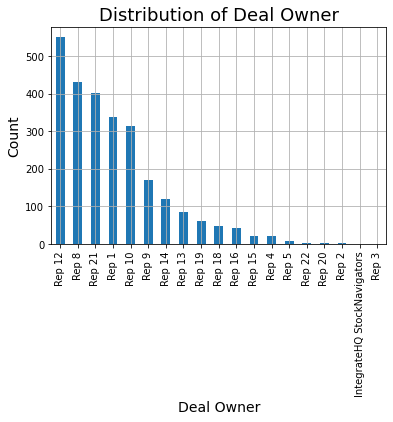

Deal Owner


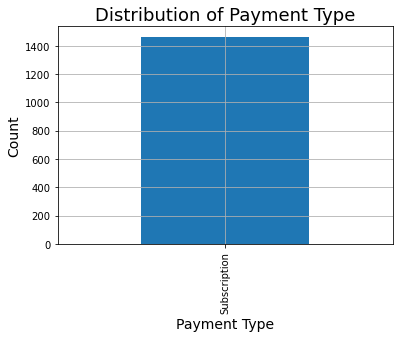

Payment Type


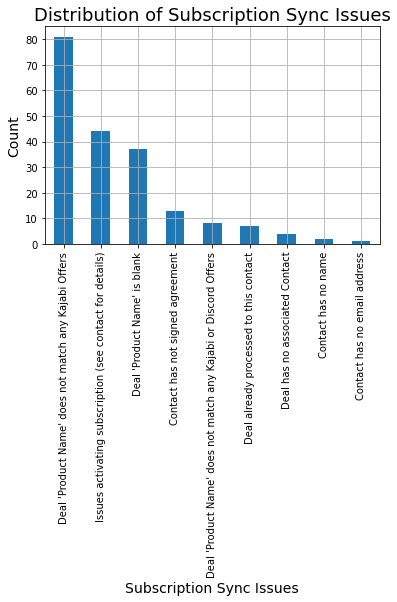

Subscription Sync Issues


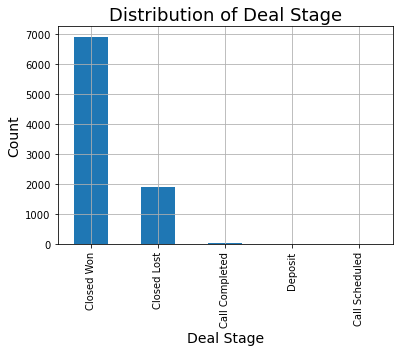

Deal Stage


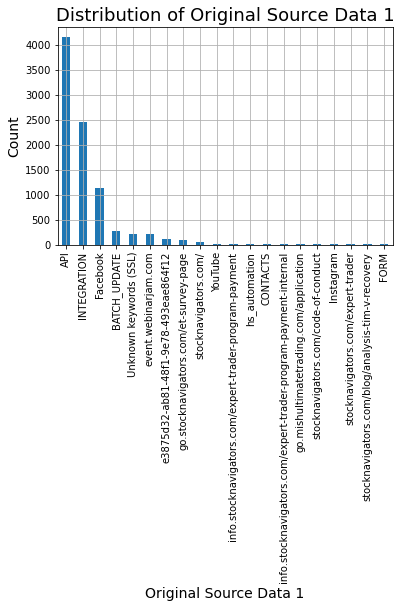

Original Source Data 1


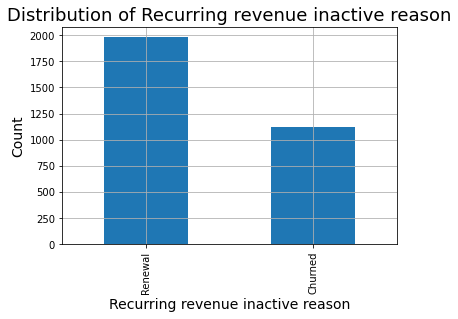

Recurring revenue inactive reason


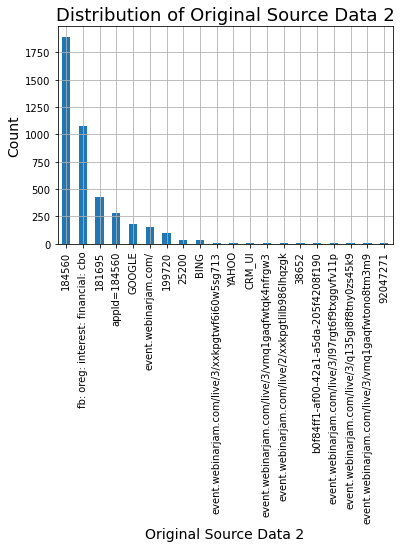

Original Source Data 2


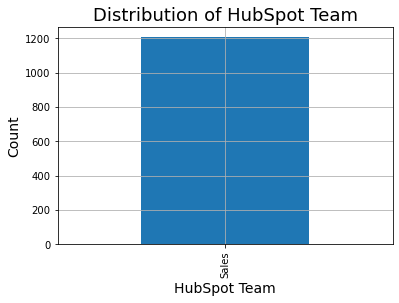

HubSpot Team


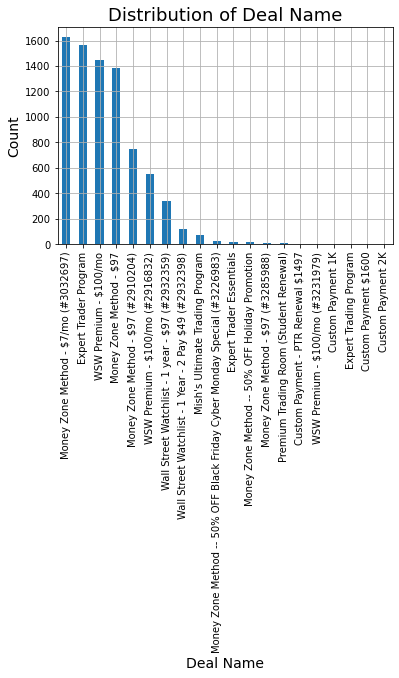

Deal Name


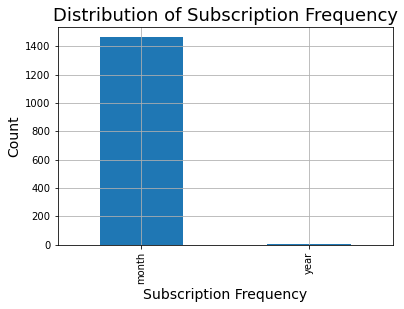

Subscription Frequency


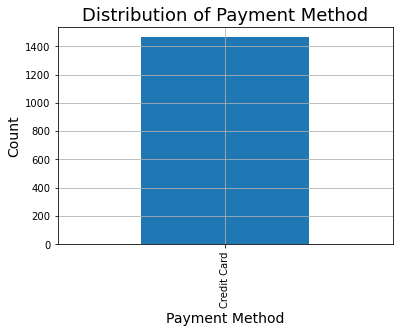

Payment Method


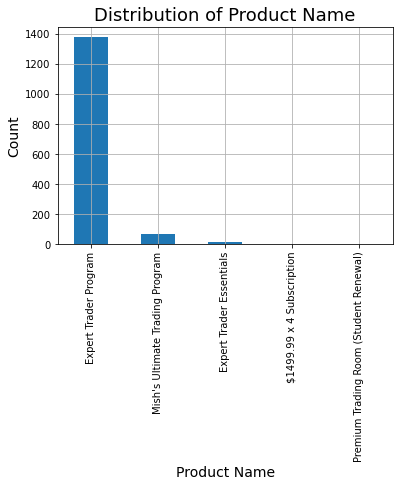

Product Name


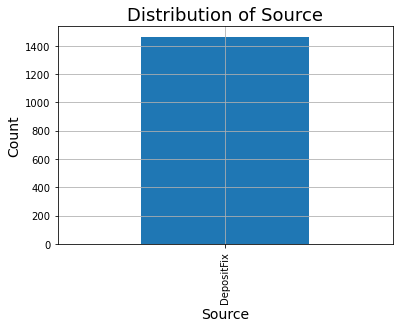

Source


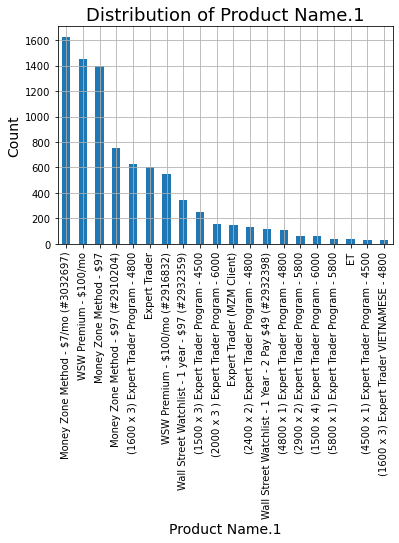

Product Name.1


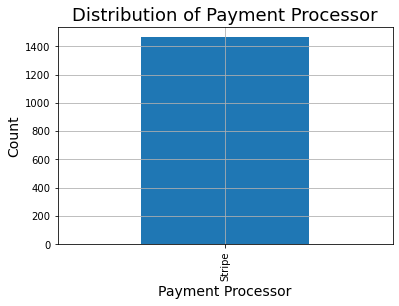

Payment Processor


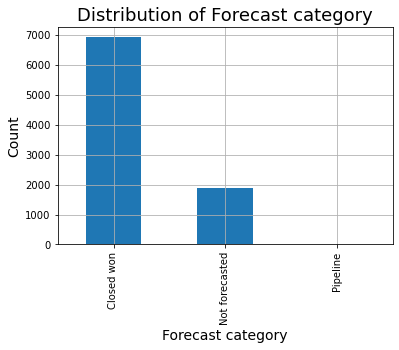

Forecast category


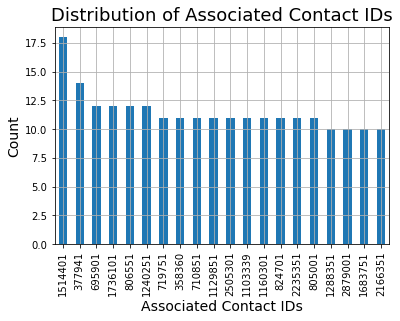

Associated Contact IDs


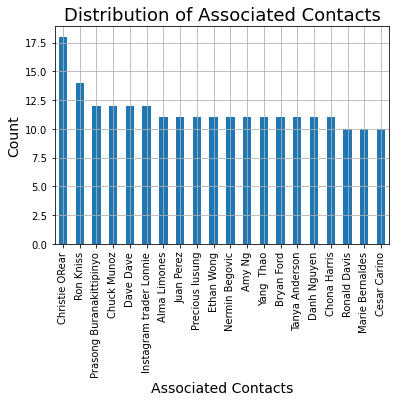

Associated Contacts


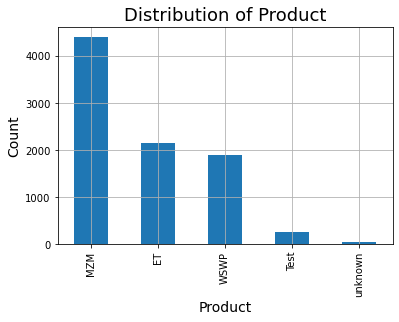

Product


In [22]:
plotdist(categorical_cols)

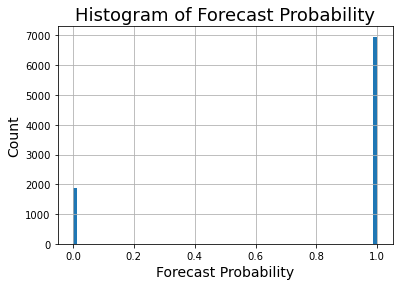

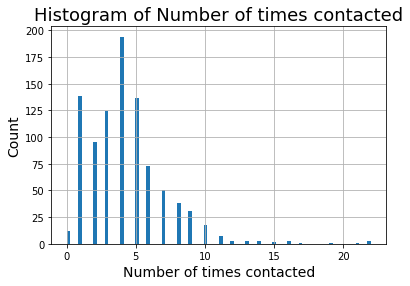

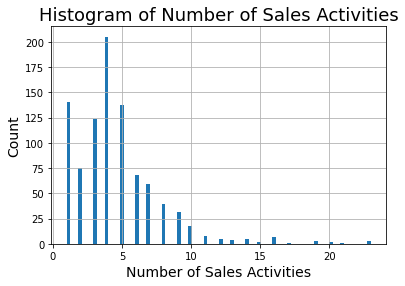

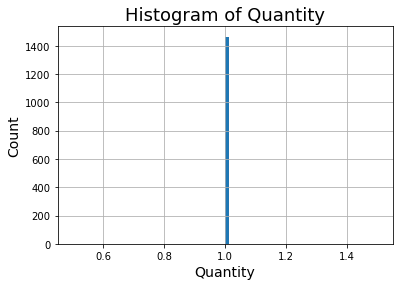

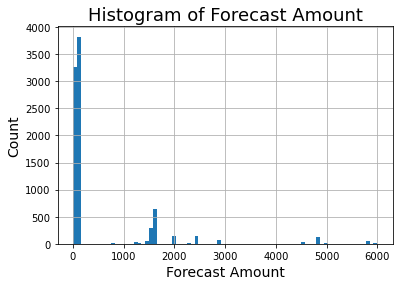

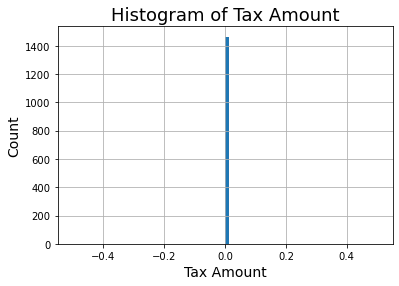

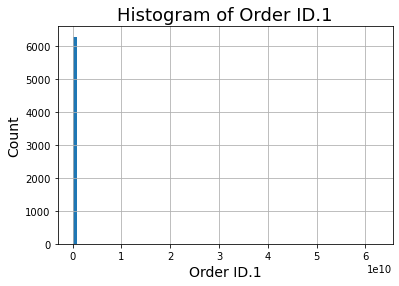

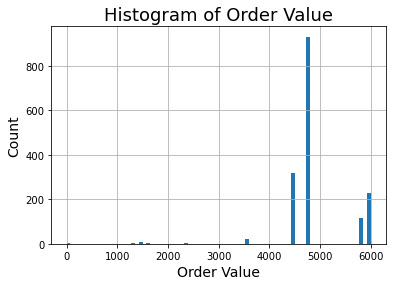

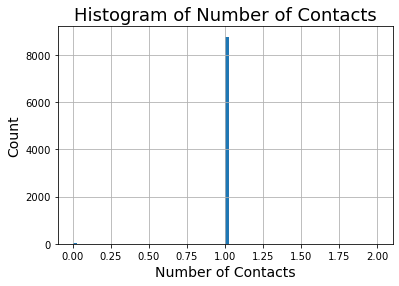

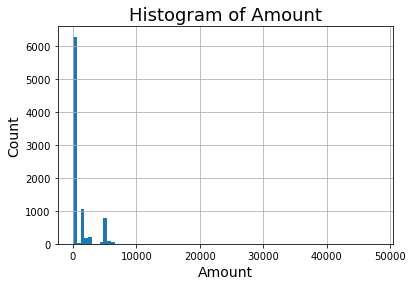

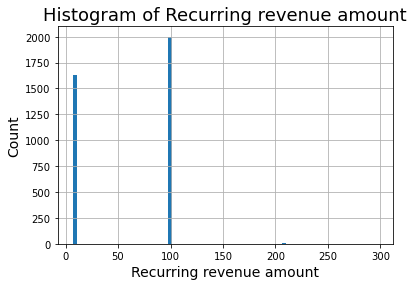

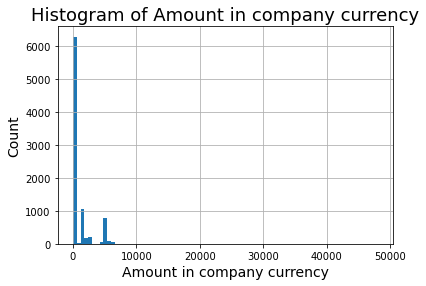

In [23]:
plothist(numeric_cols)

## Multivariate Plots

In [24]:
def multivariate_plot(df, groupby, var):
    
    df.groupby(by = groupby)[var].sum().sort_values(ascending = False)\
        .head(20).plot(kind = 'bar')
    plt.grid()
    plt.title(f'Total {var} by {groupby}',fontsize=18)
    plt.xlabel(f'{groupby}',fontsize=14)
    plt.ylabel(f'{var}',fontsize=14)
    return plt.show()

In [25]:
temp_cols = ['Amount','Forecast Amount',
             'Number of Contacts','Recurring revenue amount',
             'Amount in company currency']

### Associated ID

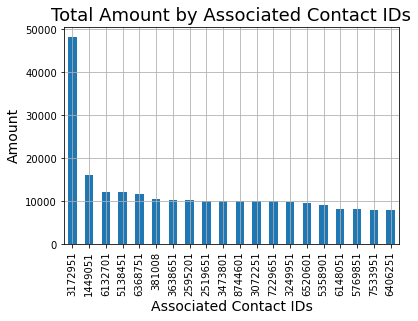

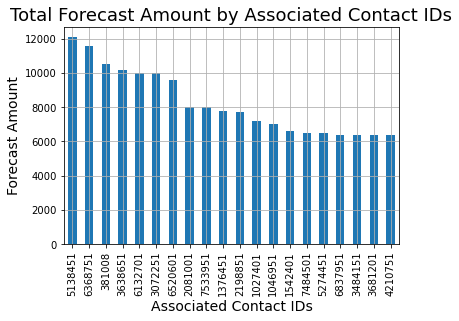

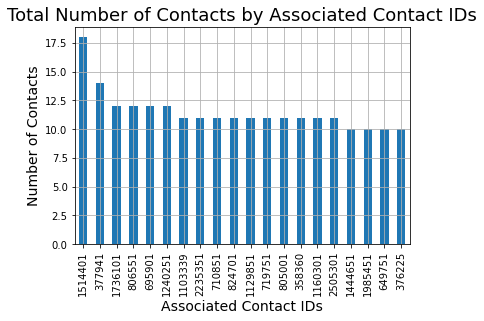

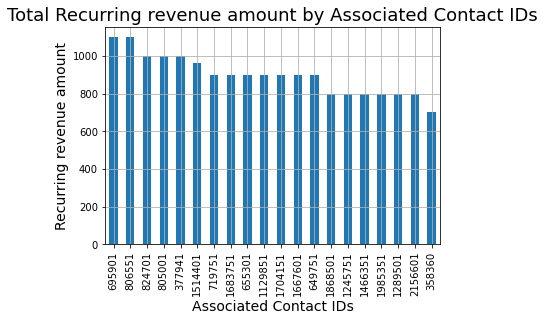

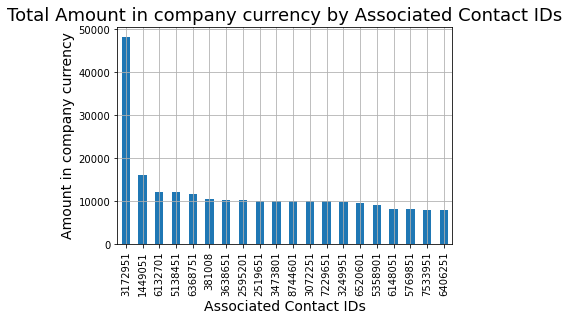

In [26]:
groupby = 'Associated Contact IDs'
df = payments
for var in temp_cols:
    multivariate_plot(df, groupby, var)

Safaa Abdulhadi 417801

### Product name

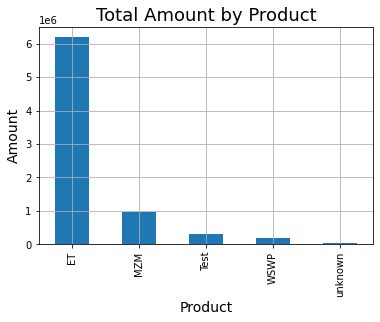

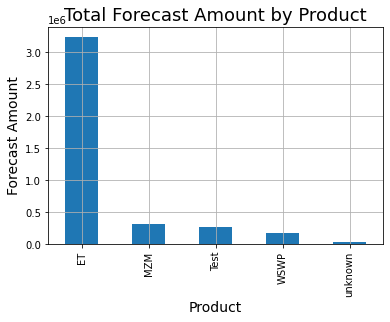

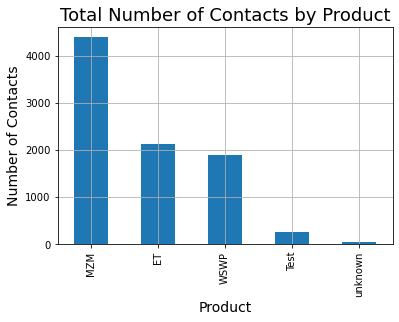

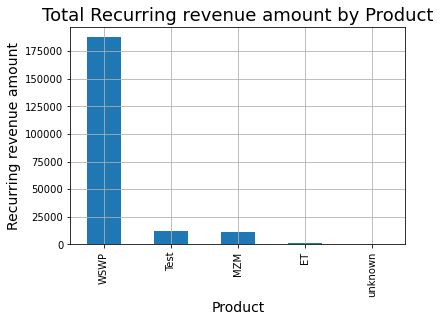

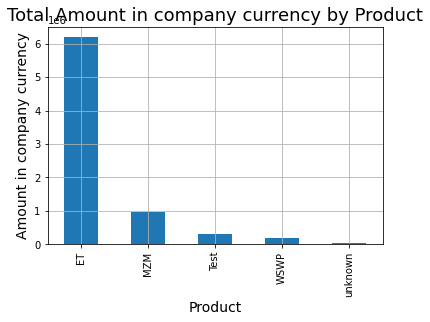

In [27]:
groupby = 'Product'
df = payments
for var in temp_cols:
    multivariate_plot(df, groupby, var)

In [28]:
payments.columns

Index(['Deal ID', 'Mode', 'State of Residence', 'Last Modified Date',
       'Processing mode', 'Recurring revenue Product Code', 'Pipeline',
       'Forecast Probability', 'Close Date', 'Deal Type',
       'Number of times contacted', 'Number of Sales Activities',
       'Payment Status', 'Recurring revenue deal type', 'Original Source Type',
       'Quantity', 'Forecast Amount', 'Order ID', 'Tax Amount', 'Create Date',
       'Sales Rep', 'Processed date', 'Order ID.1', 'Currency', 'Deal Owner',
       'Last Activity Date', 'Owner Assigned Date', 'Payment Type',
       'Order Value', 'Subscription Sync Issues', 'Deal Stage',
       'Number of Contacts', 'Original Source Data 1',
       'Recurring revenue inactive reason', 'Original Source Data 2',
       'Last Contacted', 'Refund Date', 'HubSpot Team', 'Deal Name',
       'Subscription Frequency', 'Payment Method', 'Amount', 'Product Name',
       'Source', 'Product Name.1', 'Payment Processor',
       'Recurring revenue inactive dat

### Sales Rep

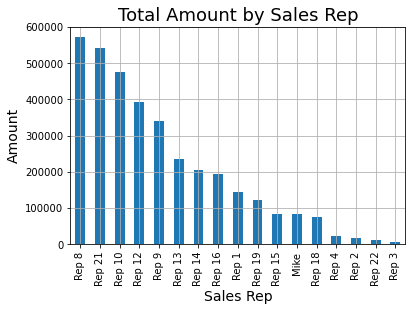

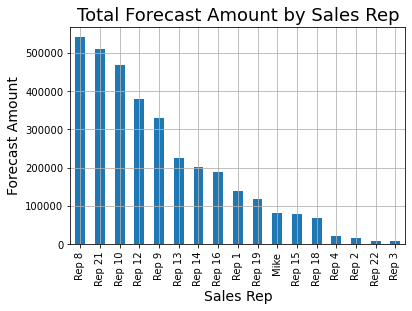

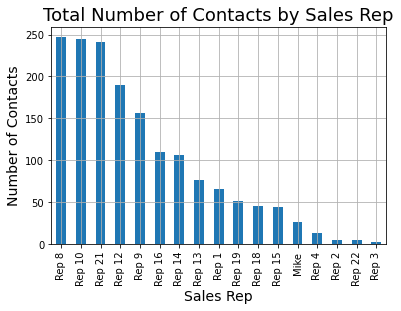

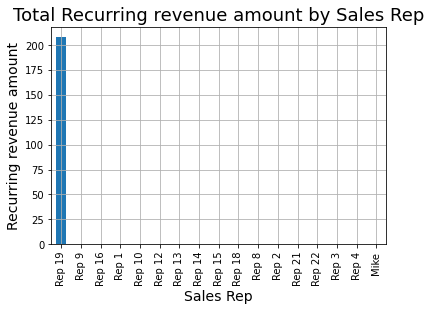

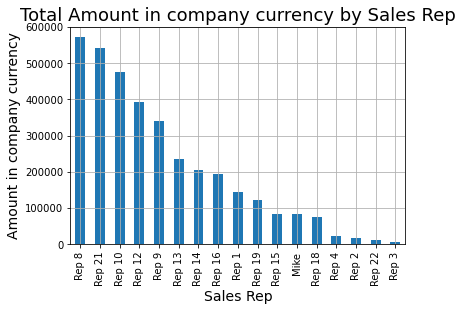

In [29]:
groupby = 'Sales Rep'
df = payments
for var in temp_cols:
    multivariate_plot(df, groupby, var)

## a customer account close view

In [30]:
c1289501 = payments[payments['Associated Contact IDs'] == '1289501']


In [31]:
c1289501[['Recurring revenue Product Code','Product Name.1','Create Date','Recurring revenue inactive date','Amount']]

,Recurring revenue Product Code,Product Name.1,Create Date,Recurring revenue inactive date,Amount
4242,NaN,Money Zone Method - $97 (#2910204),2020-09-03 21:45:00,NaT,97.0
4454,wswp,WSW Premium - $100/mo,2021-06-01 03:59:00,NaT,100.0
5110,wswp,WSW Premium - $100/mo,2021-04-02 01:57:00,2021-05-01 17:00:00,100.0
5434,wswp,WSW Premium - $100/mo,2021-03-03 00:49:00,2021-03-31 17:00:00,100.0
5907,wswp,WSW Premium - $100/mo (#2916832),2021-01-02 00:46:00,2021-02-01 16:00:00,100.0
6055,wswp,WSW Premium - $100/mo (#2916832),2020-12-03 00:50:00,2020-12-31 16:00:00,100.0
6181,wswp,WSW Premium - $100/mo (#2916832),2020-11-03 00:46:00,2020-12-01 16:00:00,100.0
6287,wswp,WSW Premium - $100/mo (#2916832),2020-10-04 01:51:00,2020-11-01 16:00:00,100.0
6565,wswp,WSW Premium - $100/mo (#2916832),2020-09-03 21:50:00,2020-10-02 17:00:00,100.0


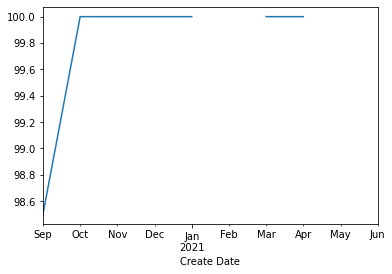

In [32]:
c1289501.resample('M',on = 'Create Date')['Amount'].mean().plot()

## Churn Analysis

### Churn rate for recurring products

#### Label all the exsiting Churned Customers at 2021-06

If a customers purchased a recurring product, and the last payment was created before May 1st 2021, consider it as churned. 
If a customer never purchased a recurring product, consider it as churned. 


In [33]:
## find the customer churned from a recurring product
paid_customer_id = list(payments['Associated Contact IDs'].value_counts().index)
recur_cust  = payments[payments['Recurring revenue Product Code'].notnull()]
cutoff = pd.to_datetime('2021-05-01',format = '%Y-%m-%d')
churned_from_recuring = []
for cust in paid_customer_id:
    cust_temp = recur_cust[recur_cust['Associated Contact IDs'] == cust]
    df_temp = cust_temp[['Recurring revenue Product Code','Product Name.1',
                         'Create Date','Recurring revenue inactive date']]
    if cust_temp['Create Date'].max() < cutoff:
        churned_from_recuring.append(cust)
        
   

In [34]:
len(churned_from_recuring)

693

In [35]:
## find the customers who never purchased any recurring products
cutoff = pd.to_datetime('2021-05-01',format = '%Y-%m-%d')
churned_wo_recurring = []

for cust in paid_customer_id:
    cust_temp = payments[payments['Associated Contact IDs'] == cust]
    df_temp = cust_temp[['Recurring revenue Product Code','Product Name.1',
                         'Create Date','Recurring revenue inactive date']]
    if cust_temp['Recurring revenue Product Code'].notnull().sum() == 0:
        churned_wo_recurring.append(cust)

In [36]:
len(churned_wo_recurring)

2801

#### Monthly Number of Churned Customer from recurring products 

In [37]:
#Churned Month Definition: the next month of the last recurring inactive date month of each churned customer
## (this definition doesn't consider the customer who renewal subscription after a few month)

churn_month =[]

for cust in churned_from_recuring:
    cust_temp = payments[payments['Associated Contact IDs'] == cust]
    df_temp = cust_temp[['Recurring revenue Product Code','Product Name.1','Create Date','Recurring revenue inactive date']]
    lastInactived_date = cust_temp['Recurring revenue inactive date'].max()
    
    churn_month.append(lastInactived_date)
    

In [38]:
churn_from_recurring_df = pd.DataFrame({'Contact_ID':churned_from_recuring, 
                                        'Last Active Month':churn_month})

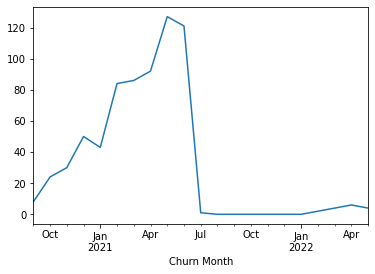

In [39]:
### monthly number of customers from recurring products 

from pandas.tseries.offsets import *
churn_from_recurring_df['Churn Month'] = churn_from_recurring_df['Last Active Month'] + DateOffset(months=+1)
churn_from_recurring_df.resample('M',on = 'Churn Month')['Contact_ID'].count().plot()

In [40]:
monthly_churn_recurring_client = churn_from_recurring_df.resample('M',on = 'Churn Month')['Contact_ID'].count()

#### Total number of recurring product client per month

In [41]:

payments['Recurring revenue amount'].notnull().sum()

3633

2020,9 2021,6

In [42]:
###why???????? lost a lot of rows
temp = payments[payments['Recurring revenue amount'].notnull()].groupby('Associated Contact IDs').agg({'Deal ID':'count',
                                                                                                'Recurring revenue amount':'sum',
                                                                                                'Recurring revenue inactive date':'max'
                                                                                           }).reset_index()

In [43]:
### number of existing recurring product client in May 

temp[(temp['Recurring revenue inactive date'] <'2021-06-01') & 
     (temp['Recurring revenue inactive date'] >='2021-05-01')]

,Associated Contact IDs,Deal ID,Recurring revenue amount,Recurring revenue inactive date
8,1102392,6,600.0,2021-05-23 17:00:00
9,1103339,9,63.0,2021-05-29 17:00:00
13,1106989,2,107.0,2021-05-12 17:00:00
14,1107391,2,107.0,2021-05-29 17:00:00
15,1108677,3,300.0,2021-05-13 17:00:00
...,...,...,...,...
1177,8816901,2,200.0,2021-05-30 17:00:00
1180,8859651,2,14.0,2021-05-31 17:00:00
1182,8886901,2,14.0,2021-05-31 17:00:00
1192,9002801,2,14.0,2021-05-23 17:00:00


(606.0, 618.0)

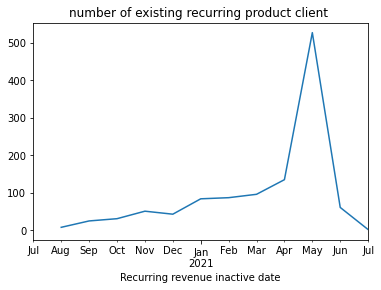

In [44]:
monthly_total_recurring_client = temp.resample('M',on = 'Recurring revenue inactive date')['Associated Contact IDs'].count()
temp.resample('M',on = 'Recurring revenue inactive date')['Associated Contact IDs'].count().plot()
plt.title('number of existing recurring product client ')
plt.xlim('2020-07-01','2021-07-01')

In [45]:
monthly_churn_recurring_client = pd.Series(0,index = ['2020-07-31 00:00:00']).add(monthly_churn_recurring_client,fill_value=0)



In [46]:
monthly_churn_rate_df = pd.DataFrame({'Date':monthly_total_recurring_client.index,
              'monthly_total_recurring_client_Count':monthly_total_recurring_client.values,
                'monthly_churn_recurring_client_Count':monthly_churn_recurring_client.values})

In [47]:
monthly_churn_rate_df['monthly_churn_rate'] = monthly_churn_rate_df['monthly_churn_recurring_client_Count']/monthly_churn_rate_df['monthly_total_recurring_client_Count']
monthly_churn_rate_df

,Date,monthly_total_recurring_client_Count,monthly_churn_recurring_client_Count,monthly_churn_rate
0,2020-08-31,8,0.0,0.000000
1,2020-09-30,25,8.0,0.320000
2,2020-10-31,31,24.0,0.774194
3,2020-11-30,51,30.0,0.588235
4,2020-12-31,43,50.0,1.162791
5,2021-01-31,84,43.0,0.511905
6,2021-02-28,87,84.0,0.965517
7,2021-03-31,96,86.0,0.895833
8,2021-04-30,135,92.0,0.681481
9,2021-05-31,527,127.0,0.240987


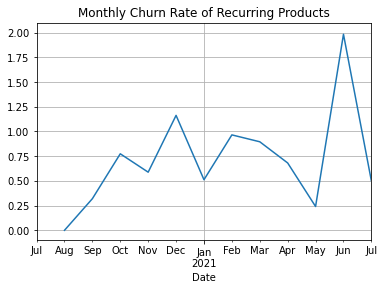

In [48]:
monthly_churn_rate_df.resample('M',on = 'Date')['monthly_churn_rate'].sum().plot()
plt.title('Monthly Churn Rate of Recurring Products')
plt.xlim('2020-07-01','2021-07-01')
plt.grid()

### Churn rate for non-recurring products

### Churn Prediction

## Calculate Customer Lifetime Value

### Average duration that a customer staying with us